# Section 4.2 : BATCH SIZES
## Summary
- Section 4.1 showed that LR is a very important parameter
- Optimal LR is closely tied to batchsize
- Optimising batchsize is difficult - it is also a function of computer hardware capability (processor, RAM, GPU), as well as dataset and architecture
- Some experiments show improved regularisation with smaller batches
- Other experiments then recommed larger ones
- Difficulty stems from whether the number of epochs or number of iterations is kept constant
- Section 4.2 compares by keeping train time constant
- Ends up recommending larger batch sizes, which have the added benefit of helping to achieve superconvergence via 1cycle

## Batchsize Optimisation Example
1. Test range of batchsizes [32-2048]
1. For simplicity, only use constant LR, determined per batchsize from LRFinder
1. Train each network for 30 epoch
1. Determine epoch time for each batchsize
1. Only consider only epochs upto a set time (optimised on convergence time for bs=256)
1. Compare performance and converegence time

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data, features = importData()

Training on 250000 datapoints with 31 features:
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


In [3]:
preprocParams = {'normIn':True, 'pca':False}
trainIndeces, valIndeces = train_test_split([i for i in data.index.tolist()], test_size=0.2)
train, val = foldPrep(data.iloc[trainIndeces], data.iloc[valIndeces], features, preprocParams)

### BS=256

In [10]:
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'sgd', 'depth':3, 'width':128}
modelParams = {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs}
trainParams = {'epochs':30, 'verbose':0}

In [11]:
history256, time256 = timeBatchsize(modelParams, train, val, 5e2, 256, trainParams)

Minimum of 0.00000329 achieved in 18 epochs, 1.36 seconds/epoch


In [12]:
epochs256 = np.argmin(history256.history['val_loss'])
totalTime = np.argmin(history256.history['val_loss'])*time256
print("Consider {:.3f} seconds of training".format(totalTime))

Consider 24.475 seconds of training


### bs=32

Epoch 1/1
135232/200000 [===================>..........] - ETA: 2s - loss: 5.7885e-06
______________________________________
Training finished
LR finder took 6.172s 


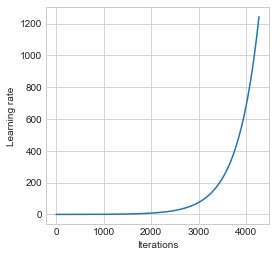

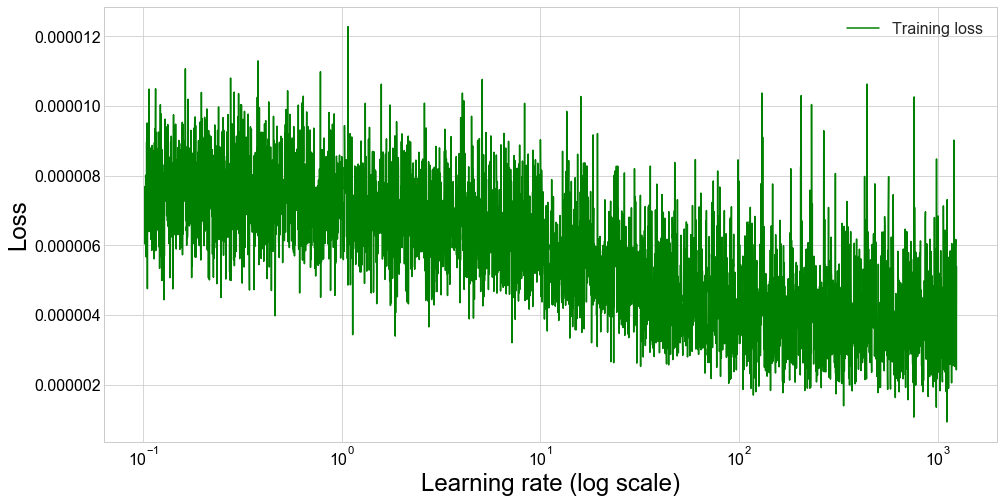

______________________________________



In [13]:
lrFinder = runLRFinder(data, features, {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs},
                       {**trainParams, 'batch_size':32}, preprocParams, useValidation=0, lrBounds=[1e-1, 1e5]) 

In [14]:
history32, time32 = timeBatchsize(modelParams, train, val, 2e1, 32, trainParams)

Minimum of 0.00000332 achieved in 27 epochs, 6.79 seconds/epoch


In [15]:
epochs32 = math.ceil(totalTime/time32)
print("Consider {} epochs of training".format(epochs32))

Consider 4 epochs of training


### bs=64

Epoch 1/1
190272/200000 [===========================>..] - ETA: 0s - loss: 5.5370e-06
______________________________________
Training finished
LR finder took 5.314s 


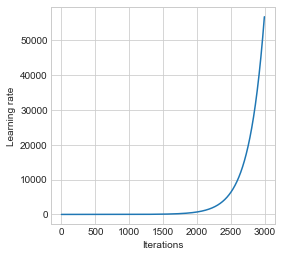

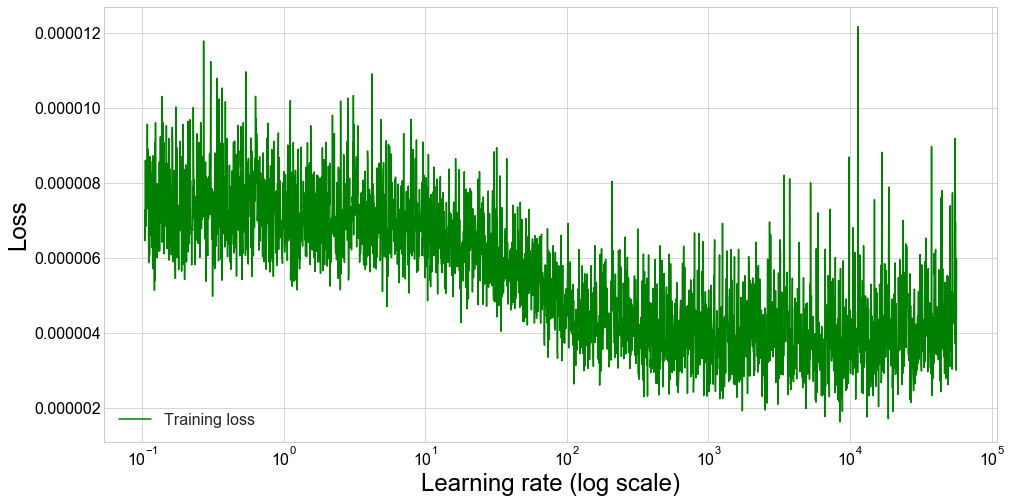

______________________________________



In [16]:
lrFinder = runLRFinder(data, features, {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs},
                       {**trainParams, 'batch_size':64}, preprocParams, useValidation=0, lrBounds=[1e-1, 1e5]) 

In [17]:
history64, time64 = timeBatchsize(modelParams, train, val, 4e1, 64, trainParams)

Minimum of 0.00000331 achieved in 27 epochs, 4.43 seconds/epoch


In [18]:
epochs64 = math.ceil(totalTime/time64)
print("Consider {} epochs of training".format(epochs64))

Consider 6 epochs of training


### bs=128

Epoch 1/1
197760/200000 [============================>.] - ETA: 0s - loss: 5.4482e-06
______________________________________
Training finished
LR finder took 3.706s 


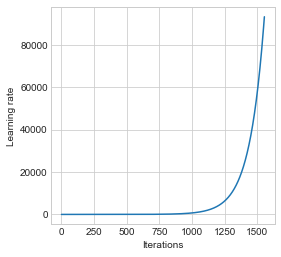

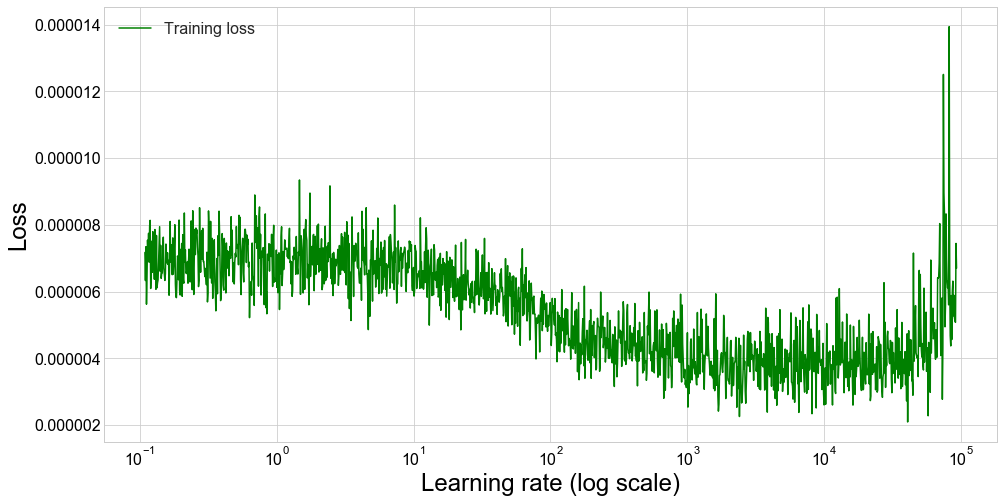

______________________________________



In [19]:
lrFinder = runLRFinder(data, features, {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs},
                       {**trainParams, 'batch_size':128}, preprocParams, useValidation=0, lrBounds=[1e-1, 1e5]) 

In [20]:
history128, time128 = timeBatchsize(modelParams, train, val, 8e1, 128, trainParams)

Minimum of 0.00000332 achieved in 26 epochs, 3.25 seconds/epoch


In [21]:
epochs128 = math.ceil(totalTime/time128)
print("Consider {} epochs of training".format(epochs128))

Consider 8 epochs of training


### bs=512

Epoch 1/1
200000/200000 [==============================] - 1s 6us/step - loss: 5.9460e-06

______________________________________
Training finished
LR finder took 1.970s 


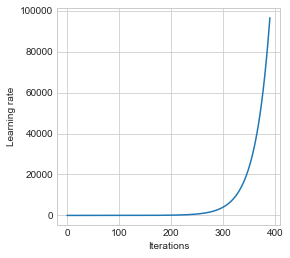

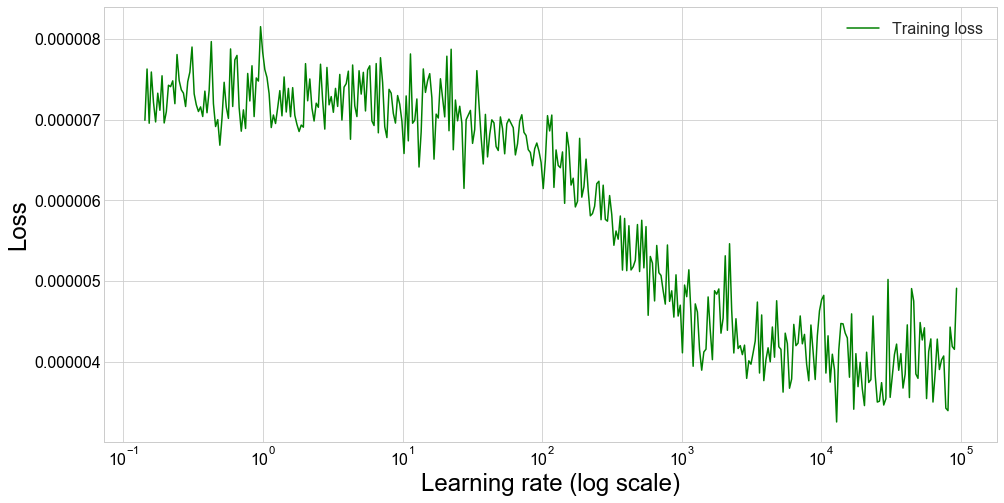

______________________________________



In [39]:
lrFinder = runLRFinder(data, features, {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs},
                       {**trainParams, 'batch_size':512}, preprocParams, useValidation=0, lrBounds=[1e-1, 1e5]) 

In [40]:
history512, time512 = timeBatchsize(modelParams, train, val, 6e2, 512, trainParams)

Minimum of 0.00000329 achieved in 25 epochs, 1.02 seconds/epoch


In [41]:
epochs512 = math.ceil(totalTime/time512)
print("Consider {} epochs of training".format(epochs512))

Consider 25 epochs of training


### bs=1024

In [64]:
trainParams = {'epochs':40, 'verbose':0}

Epoch 1/1
200000/200000 [==============================] - 1s 4us/step - loss: 5.9854e-06

______________________________________
Training finished
LR finder took 1.810s 


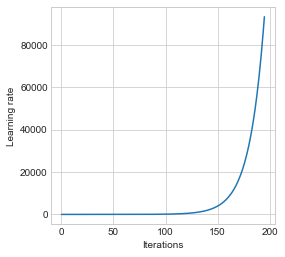

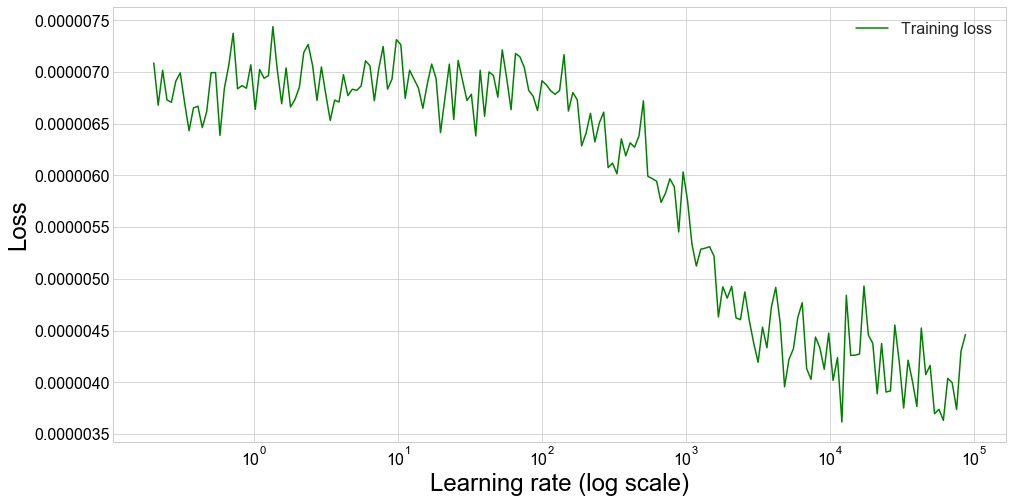

______________________________________



In [48]:
lrFinder = runLRFinder(data, features, {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs},
                       {**trainParams, 'batch_size':1024}, preprocParams, useValidation=0, lrBounds=[1e-1, 1e5]) 

In [65]:
history1024, time1024 = timeBatchsize(modelParams, train, val, 5e3, 1024, trainParams)

Minimum of 0.00000331 achieved in 8 epochs, 0.71 seconds/epoch


In [66]:
epochs1024 = math.ceil(totalTime/time1024)
print("Consider {} epochs of training".format(epochs1024))

Consider 35 epochs of training


### bs=2048

In [51]:
trainParams = {'epochs':50, 'verbose':0}

Epoch 1/1
200000/200000 [==============================] - 1s 3us/step - loss: 6.4255e-06

______________________________________
Training finished
LR finder took 1.556s 


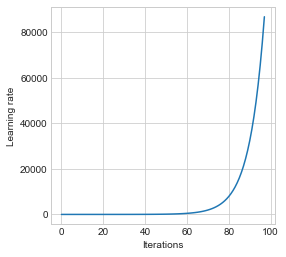

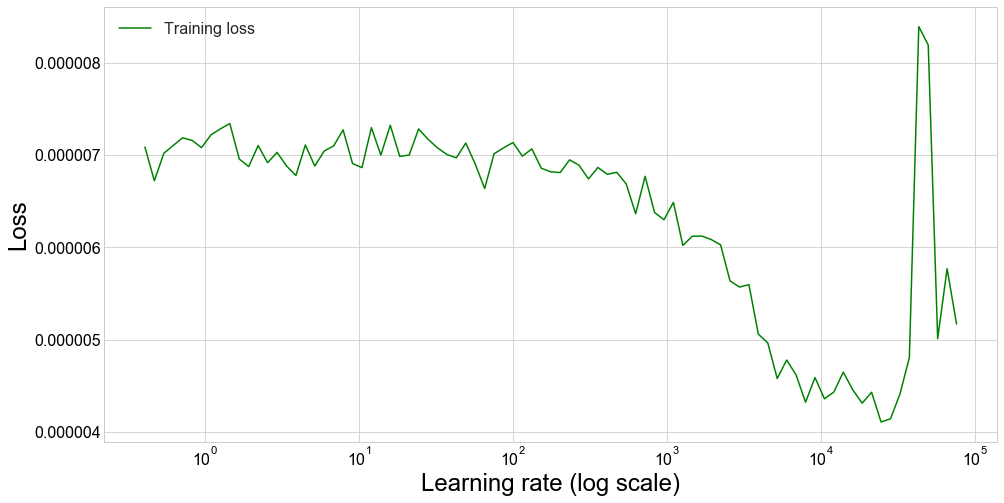

______________________________________



In [52]:
lrFinder = runLRFinder(data, features, {'version':'modelRelu', 'nIn':len(features), 'compileArgs':compileArgs},
                       {**trainParams, 'batch_size':2048}, preprocParams, useValidation=0, lrBounds=[1e-1, 1e5]) 

In [53]:
history2048, time2048 = timeBatchsize(modelParams, train, val, 7e3, 2048, trainParams)

Minimum of 0.00000329 achieved in 14 epochs, 0.59 seconds/epoch


In [54]:
epochs2048 = math.ceil(totalTime/time2048)
print("Consider {} epochs of training".format(epochs2048))

Consider 42 epochs of training


### Comparison

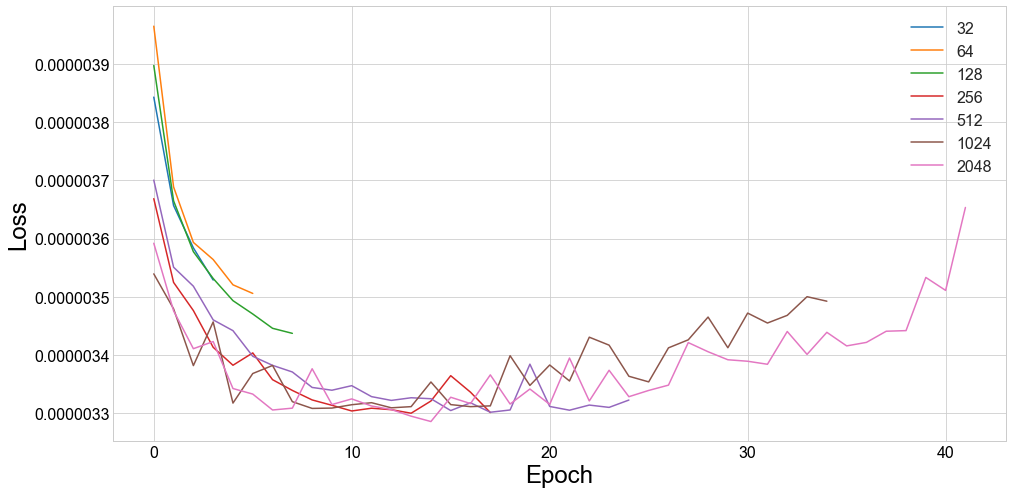

In [67]:
getModelHistoryComparisonPlot([{'val_loss':history32.history['val_loss'][:epochs32]},
                               {'val_loss':history64.history['val_loss'][:epochs64]},
                               {'val_loss':history128.history['val_loss'][:epochs128]},
                               {'val_loss':history256.history['val_loss'][:epochs256]},
                               {'val_loss':history512.history['val_loss'][:epochs512]},
                               {'val_loss':history1024.history['val_loss'][:epochs1024]},
                               {'val_loss':history2048.history['val_loss'][:epochs2048]}],
                              ['32', 64, 128, 256, 512, 1024, 2048])

From this we can see that low batchsizes run very slowly (can only show a few epochs), and do not allow the use of high learning rates (slow convergence). As the batchsize is increased, larger learning rates can be used, but the convergence becomes less stable. For batchsizes of 256 and above, the networks converge to about the same loss in the smae number of epochs (although the higher batchsizes will do so quicker (time-wise)). BS=256 (<span style="color:red">red</span>) appears to offer the optimal point between stability and convergence time, for this dataset, architecture, and computer.